(ttest-exercises-notebook)=
# Esercizi sull'inferenza frequentista

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import xarray as xr
import arviz as az
import pingouin as pg

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# check pymc version
print(f"Running on PyMC v{pm.__version__}")


Running on PyMC v5.3.0


In [4]:
# Initialize random number generator
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

sns.set_theme(palette="colorblind")

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = "svg"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


La tabella seguente descrive le proprietà delle distribuzioni campionarie della media, della differenza tra due medie indipendenti, della proporzione e della differenza tra due proporzioni:

| Distribuzione | Media | Varianza |
|---------------|-------|----------|
| Media campionaria | $\mu$ | $\frac{\sigma^2}{n}$ |
| Differenza tra due medie indipendenti | $\mu_1 - \mu_2$ | $\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}$ |
| Proporzione campionaria | $p$ | $\frac{p(1-p)}{n}$ |
| Differenza tra due proporzioni campionarie | $p_1 - p_2$ | $\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}$ |

Nella tabella, $\mu$ rappresenta la media della popolazione, $\sigma$ rappresenta la deviazione standard della popolazione, $n$ rappresenta la dimensione del campione, $p$ rappresenta la proporzione della popolazione, e $n_1$ e $n_2$ rappresentano le dimensioni dei campioni delle due popolazioni considerate. La varianza è indicata come $\sigma^2$ per la media campionaria, $\sigma_1^2$ e $\sigma_2^2$ per la differenza tra due medie indipendenti, e $p_1(1-p_1)$ e $p_2(1-p_2)$ per la differenza tra due proporzioni campionarie.

L'approccio frequentista nell'inferenza statistica fa uso delle proprietà della distribuzione campionaria della statistica di test per la costruzione di intervalli di confidenza o per il test di ipotesi statistiche. 

In questo capitolo esamineremo alcuni esercizi sul test t di Student e sulla costruzione degli intervalli di confidenza.

## Inferenza statistica su una singola media

### Test $t$ di Student a un campione

Per descrivere l'inferenza su una singola media consideriamo il seguente esempio. È stato condotto uno studio di ricerca al fine di esaminare le differenze tra gli adulti anziani e quelli giovani sulla percezione della soddisfazione nella vita. Per testare questa ipotesi, è stato effettuato uno studio pilota su dati ipotetici. Il test è stato somministrato a dieci adulti anziani (oltre i 70 anni) e dieci adulti giovani (tra i 20 e i 30 anni). La scala di valutazione utilizzata ha un range di punteggi da 0 a 60, dove punteggi elevati indicano una maggiore soddisfazione nella vita e punteggi bassi indicano una minore soddisfazione. È stata scelta una scala con elevata affidabilità e validità. I dati (fittizi) raccolti sono riportati di seguito.

In [5]:
younger = np.array([45, 38, 52, 48, 25, 39, 51, 46, 55, 46])
older = np.array([34, 33, 36, 38, 37, 40, 42, 43, 32, 36])

Per ora, esaminiamo soltanto il gruppo degli adulti più anziani. Si suppponga che studi precedenti indichino che, per questo gruppo d'età, la soddisfazione della vita misurata con questo test sia pari a 60. Svolgiamo il test t di Student usando l'ipotesi nulla che nella popolazione la media sia effettivamente uguale a 40.

Inziamo a svolgere l'esercizio applicando la funzione `ttest` del modulo `pingouin`. 

Il modulo `pingouin` si installa con

```
conda install -c conda-forge pingouin
```

oppure con

```
pip install pingouin
```

Per l'esempio presente, poniamo $\mu_0$, la media dell'ipotesi nulla, uguale a 40. Svolgiamo l'esercizio con `ttest`.

In [28]:
res = pg.ttest(older, 40)

Esaminiamo il risultato.

In [36]:
print(res)

               T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -2.481666    9   two-sided  0.034896  [34.46, 39.74]  0.784772  2.319   

           power  
T-test  0.599895  


**Interpretazione.** Dato che il valore-p è minore di $\alpha$ = 0.05, ovvero in modo equivalente, dato che la statistica test cade nella regione di rifiuto, rifiutiamo $H_0: \mu = 40$.

Procediamo ora con i calcoli passo-passo utilizzando la formula del test t di Student. La statistica $T$ calcolata dal test è definita come:

$$
T = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} = \frac{\bar{X} - \mathbb{E}(X)}{s / \sqrt{n}},
$$

dove $\bar{X}$ è la media campionaria, $\mu_0$ è l'ipotesi nulla sulla media della popolazione, $s$ è la deviazione standard campionaria e $n$ è la dimensione del campione. Tale statistica ha una semplice interpretazione: essa corrisponde alla standardizzazione della media del campione all'interno della distribuzione campionaria delle medie di ampiezza $n$ = 10. La distribuzione campionaria delle medie di ampiezza $n$ = 10 ha media $\mu_{\bar{X}} = \mu$ e varianza $\sigma^2_{\bar{X}} = \frac{\sigma^2}{n}$, dove $\mu$ è la media della popolazione e $\sigma^2$ è la varianza della popolazione da cui il campione è stato estratto.

Tuttavia, poiché i parametri della popolazione sono sconosciuti, l'approccio frequentista utilizza la media ipotizzata dall'ipotesi nulla $H_0$ al posto della media sconosciuta della popolazione e stima il parametro sconosciuto $\sigma$ con la deviazione standard $s$ del campione. In queste circostanze, la statistica $T$ segue la distribuzione $t$ di Student con $n-1$ gradi di libertà *se il campione è stato estratto da una popolazione normale*. Pertanto, la statistica $T$ è simile alla statistica $Z$, definita come:

$$
Z = \frac{\bar{Y} - \mu}{\sigma / \sqrt{n}},
$$

dove $\bar{Y}$ è la media campionaria, $\mu$ è la media della popolazione, $\sigma$ è la deviazione standard della popolazione e $n$ è la dimensione del campione. La statistica $Z$ rappresenta la standardizzazione della media campionaria all'interno dell'universo delle medie di campioni di ampiezza $n$. In altre parole, essa fornisce un valore normalizzato della media del campione rispetto alla distribuzione delle medie di tutti i possibili campioni di dimensione $n$.

Svolgiamo i calcoli con Python.

In [30]:
T = (np.mean(older) - 40) / (np.std(older, ddof=1) / np.sqrt(len(older)))
T


-2.481665888425312

I gradi di libertà sono $n-1$. 

In [35]:
df = len(older) - 1
print(df)

9


Troviamo il valore-p, ovvero l'area sottesa alla distribuzione t di Student con 9 gradi di libertà nei due intervalli $[-\infty, -T]$ e $[T, +\infty]$.

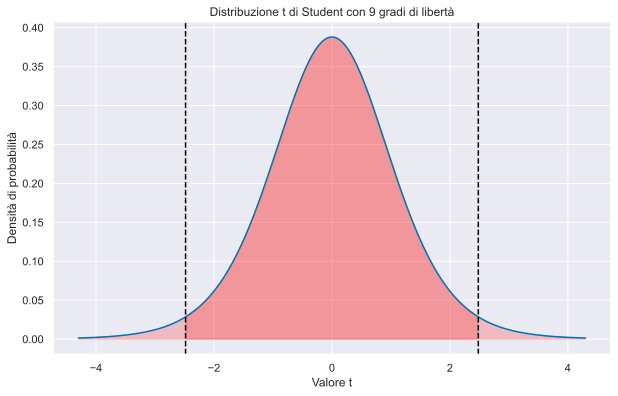

In [10]:
# Set up the x-axis values for the t-distribution plot
x = np.linspace(st.t.ppf(0.001, df), st.t.ppf(0.999, df), 1000)

# Set up the y-axis values for the t-distribution plot
y = st.t.pdf(x, df)

# Create the t-distribution plot
plt.plot(x, y, label="t-distribution")

# Shade the areas [-infinity, -T] and [T, +infinity]
plt.fill_between(x[x <= -T], y[x <= -T], color="red", alpha=0.2)
plt.fill_between(x[x >= T], y[x >= T], color="red", alpha=0.2)

# Add vertical lines for T and -T
plt.axvline(x=T, color="black", linestyle="--")
plt.axvline(x=-T, color="black", linestyle="--")


# Set the plot title and axis labels
plt.title(f"Distribuzione t di Student con {df} gradi di libertà")
plt.xlabel("Valore t")
plt.ylabel("Densità di probabilità")
plt.show()


In [32]:
st.t.cdf(T, df=len(older) - 1) * 2


0.03489593108658913

### Intervallo di confidenza per una media

Calcoliamo ora l'intervallo di confidenza al livello di fiducia del 95%. Come visto in precedenza, la procedura `ttest` ha calcolato l'intervallo di confidenza del 95% per la media della popolazione che va da 34.46 a 39.74. Questo intervallo può essere interpretato come segue: se la stessa procedura venisse applicata molte volte, in circa il 95% dei casi l'intervallo ottenuto conterrà il vero valore della media della popolazione. 

Iniziamo a trovare il valore critico della distribuzione $t$ di Student che lascia $\alpha/2$ in ciascuna coda.

In [38]:
alpha = 0.05
df # 9
t_c = st.t.ppf(1 - alpha / 2, df)
t_c

2.2621571627409915

L'intervallo di confidenza è dato da

$$
\bar{X} \pm t_{n-1} \frac{s}{\sqrt{n}}.
$$

Svolgiamo i calcoli.

In [41]:
ci_lower = np.mean(older) - t_c * np.std(older, ddof=1) / np.sqrt(len(older))
ci_upper = np.mean(older) + t_c * np.std(older, ddof=1) / np.sqrt(len(older))
print("L'intervallo di confidenza al 95% per la media della popolazione è: [{:.2f}, {:.2f}].".format(ci_lower, ci_upper))

L'intervallo di confidenza al 95% per la media della popolazione è: [34.46, 39.74].


## Confronto tra medie per campioni indipendenti

### Test $t$ di Student per campioni indipendenti

Per eseguire il test t di Student per due campioni indipendenti, iniziamo svolgendo i calcoli con la funzione `ttest` del modulo `pingouin`. L'ipotesi nulla è che la differenza tra le medie delle due popolazioni sia uguale a 0: $\mu_1 - \mu_2 = 0$. La funzione `ttest` implementa la seguente formula:

$$
T = \frac{(\bar{x}_1 - \bar{x}_2) - 0}{\sqrt{
    \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}.
}},
$$


In [45]:
res = pg.ttest(younger, older, paired=False)
print(res)

               T  dof alternative    p-val          CI95%  cohen-d   BF10  \
T-test  2.479867   18   two-sided  0.02326  [1.13, 13.67]  1.10903  2.849   

           power  
T-test  0.650317  


Svolgiamo i calcoli passo-passo.

In [48]:
t_num = np.mean(younger) - np.mean(older)
t_denom = np.sqrt(np.var(younger, ddof=1) / len(younger) + np.var(older, ddof=1) / len(older))
T = np.divide(t_num, t_denom)
T

2.479866520313643

La statistica $T$ calcolata sopra si distribuisce con $(n_1 - 1) + (n_2 - 1)$, ovvero $n_1 + n_2 - 2$, gradi di libertà.

In [49]:
df = len(younger) + len(older) - 2
print(df)

18


Il valore-p è uguale all'area sottesa alla funzione t di Student con $n_1 + n_2 - 2$ negli intervalli $[-\infty, -T]$ e $[T, +\infty]$. Nel caso presente abbiamo

In [50]:
(1 - st.t.cdf(T, df=df)) * 2


0.023260241301116924

### Intervallo di confidenza per la differenza tra due medie

Calcoliamo ora l'intervallo di confidenza al livello di fiducia del 95% per la differenza tra le due medie. Iniziamo a calcolare il valore critico $t$.

In [51]:
alpha = 0.05
t_c = st.t.ppf(1 - alpha / 2, df)
t_c


2.10092204024096

Troviamo l'errore standard della differenza tra le due medie.

In [52]:
se_diff = np.sqrt(np.var(younger, ddof=1) / len(younger) + np.var(older, ddof=1) / len(older))
se_diff

2.9840315756446754

Troviamo i limiti inferiore e superiore dell'intervallo di confidenza al 95%.

In [54]:
ci_lower = (np.mean(younger) - np.mean(older)) - (t_c * se_diff)
ci_upper = (np.mean(younger) - np.mean(older)) + (t_c * se_diff)
print("L'intervallo di confidenza al 95% per la differenza tra le due medie è: [{:.2f}, {:.2f}].".format(ci_lower, ci_upper))

L'intervallo di confidenza al 95% per la differenza tra le due medie è: [1.13, 13.67].


Si noti che i gradi di libertà sono $n_1+n_2-2$ quando le varianze delle due popolazioni sono uguali. La formula di Welch-Satterthwaite viene usata per approssimare i gradi di libertà quando le due varianze non sono uguali:

$$
\nu \approx \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1 - 1} + \frac{(s_2^2/n_2)^2}{n_2 - 1}}
$$

dove $\nu$ rappresenta i gradi di libertà approssimati, $s_1^2$ e $s_2^2$ sono le varianze campionarie delle due popolazioni, $n_1$ e $n_2$ sono le dimensioni dei due campioni.

Nel caso di varianze diverse, l'argomento `correction=True` produce una correzione dei gradi di liberta con l'approssimazione di Welch-Satterthwaite e il corrispondente valore-p.

In [55]:
res1 = pg.ttest(younger, older, paired=False, correction=True)
print(res1)

               T        dof alternative     p-val          CI95%  cohen-d  \
T-test  2.479867  12.156852   two-sided  0.028738  [0.91, 13.89]  1.10903   

         BF10     power  
T-test  2.849  0.650317  


Consideriamo ora la statistica $d$ di Cohen. Il $d$ di Cohen è una misura di effetto comunemente utilizzata per valutare la differenza tra le medie di due gruppi indipendenti. La formula del $d$ di Cohen per la differenza di due medie indipendenti è la seguente:

$$
d = \frac{\bar{X}_1 - \bar{X}_2}{s},
$$

dove $\bar{X}_1$ e $\bar{X}_2$ sono le medie dei due gruppi, e $s$ è la deviazione standard raggruppata (pooled standard deviation), definita come:

$$
s = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}},
$$

dove $n_1$ e $n_2$ sono le dimensioni dei due gruppi e $s_1$ e $s_2$ sono le deviazioni standard dei due gruppi. Il $d$ di Cohen può essere interpretato come la differenza tra le medie dei due gruppi in unità di deviazioni standard raggruppate. Un valore di $d$ di Cohen di 0.2 è considerato un effetto piccolo, un valore di 0.5 è considerato un effetto medio e un valore di 0.8 o superiore è considerato un effetto grande.

La funzione `ttest` ha trovato un valore di 1.10903. Svolgiamo i calcoli passo-passo.

Iniziamo a calcolare la deviazione standard raggruppata (pooled standard deviation).

In [56]:
s_pool_num = np.sum(
    [
        (len(younger) - 1) * np.std(younger, ddof=1) ** 2,
        (len(older) - 1) * np.std(older, ddof=1) ** 2,
    ]
)
s_pool_denom = len(younger) + len(older) - 2

s_pool = np.sqrt(np.divide(s_pool_num, s_pool_denom))
s_pool

6.672497450147301

Troviamo ora il $d$ di Cohen.

In [58]:
d = (np.mean(younger) - np.mean(older)) / s_pool
print(d)

1.1090300229094336


**Interpretazione.** Il risultato dell'analisi suggerisce che la differenza nella soddisfazione nella vita tra i due gruppi di età, misurata tramite l'indice $d$ di Cohen, è considerevole in termini di dimensione dell'effetto.

### PyMC

Svolgiamo ora lo stesso esercizio usando l'inferenza Bayesiana. Utilizzeremo distribuzioni a priori ampie per garantire un risultato simile all'analisi frequentista. Inseriamo i dati in un DataFrame.

In [19]:
y = np.concatenate((younger, older))
x = np.concatenate((np.repeat(1, len(younger)), np.repeat(0, len(older))))
df = pd.DataFrame({"y": y, "x": x})
df.head()


y  x
0  45  1
1  38  1
2  52  1
3  48  1
4  25  1

In [20]:
df.tail()

y  x
15  40  0
16  42  0
17  43  0
18  32  0
19  36  0

Creaimo il modello statistico corrispondente ad un modello di regressione con un predittore dicotomico codificato con 0 per il primo gruppo e con 1 per il secondo gruppo. Eseguiamo il campionamento MCMC.

In [21]:
with Model() as model:

    # Priors
    alpha = Normal("alpha", mu=0, sigma=200)
    beta = Normal("beta", mu=0, sigma=100)
    sigma = pm.HalfNormal("sigma", sigma=100)

    # Expected value of outcome
    mu = alpha + beta * x

    # Likelihood of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=y)

    # Sampling
    idata = pm.sample(10000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 46 seconds.


Esaminiamo le distribuzioni a posteriori dei parametri.

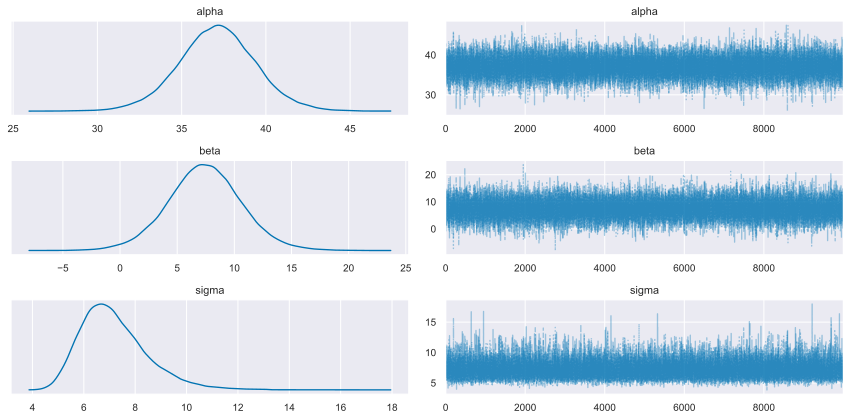

In [22]:
_ = az.plot_trace(idata, combined=True)
plt.tight_layout()

Troviamo l'intervallo di credibilità al 95% per la differenza tra le due medie.

In [23]:
np.mean(older) - np.mean(younger)

-7.399999999999999

In [24]:
az.summary(idata, hdi_prob=0.95)

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha  37.083  2.308    32.530     41.722      0.017    0.012   19037.0   
beta    7.412  3.241     0.895     13.794      0.023    0.017   19630.0   
sigma   7.184  1.329     4.901      9.831      0.010    0.007   19939.0   

       ess_tail  r_hat  
alpha   21166.0    1.0  
beta    21394.0    1.0  
sigma   20857.0    1.0

Se si utilizzano distribuzioni a priori molto ampie, i risultati del modello bayesiano tendono ad essere simili a quelli ottenuti con l'approccio frequentista. Al contrario, l'utilizzo di distribuzioni a priori più restrittive rende il modello bayesiano leggermente più conservativo rispetto all'approccio frequentista. Questo è comprensibile, considerando che il campione dati è molto limitato.

In [25]:
with Model() as model:
    
    # Priors
    alpha = Normal("alpha", mu=0, sigma=100)
    beta = Normal("beta", mu=0, sigma=20)
    sigma = pm.HalfNormal("sigma", sigma=20)
    
    # Expected value of outcome
    mu = alpha + beta * x
    
    # Likelihood of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    idata = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 37 seconds.


In [26]:
az.summary(idata, hdi_prob=0.95)

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha  37.171  2.297    32.624     41.789      0.016    0.011   20845.0   
beta    7.229  3.237     0.985     13.778      0.023    0.016   20842.0   
sigma   7.152  1.293     4.912      9.707      0.009    0.006   21343.0   

       ess_tail  r_hat  
alpha   20711.0    1.0  
beta    21747.0    1.0  
sigma   21378.0    1.0

## Project Star

Svolgiamo ora un altro esercizio usando dei dati reali relativi al progetto Star. Il Project STAR (Student-Teacher Achievement Ratio) è stato un grande esperimento educativo condotto negli Stati Uniti tra il 1985 e il 1990. L'obiettivo era quello di esaminare l'effetto della dimensione delle classi sulla performance degli studenti. In particolare, gli studenti venivano assegnati in modo casuale a classi di piccole dimensioni (13-17 studenti) o grandi dimensioni (22-25 studenti).

Il progetto coinvolse più di 6.000 studenti e 1.000 insegnanti in 79 scuole elementari in Tennessee. I risultati dello studio indicarono che gli studenti assegnati a classi più piccole hanno ottenuto risultati migliori in termini di performance accademica, partecipazione in classe, comportamento e assenze rispetto agli studenti assegnati a classi più grandi.

In questo capitolo, analizziamo una parte dei dati del Project STAR. Come variabili abbiamo i punteggi ottenuti dagli studenti ai test standardizzati di lettura e matematica alla fine del terzo anno, insieme alla percentuale di studenti che hanno completato gli studi superiori.

L'obiettivo dell'esercizio è calcolare la media dell'effetto causale della frequenza delle classi piccole rispetto alle classi di dimensioni standard sui punteggi dei test di lettura di terza elementare per tutta la popolazione target di studenti.

Leggiamo i dati dal file `STAR.csv`.

In [59]:
df_star = pd.read_csv("data/STAR.csv")
df_star.head()

classtype  reading  math  graduated
0     small      578   610          1
1   regular      612   612          1
2   regular      583   606          1
3     small      661   648          1
4     small      614   636          1

Le medie dei due gruppi sono le seguenti.

In [60]:
group_means = df_star.groupby('classtype')["reading"].mean()
print(group_means)


classtype
regular    625.492017
small      632.702564
Name: reading, dtype: float64


Generiamo un violin plot per i punteggi nel test di lettura di terza elementare per i due gruppi.

<Axes: xlabel='classtype', ylabel='reading'>

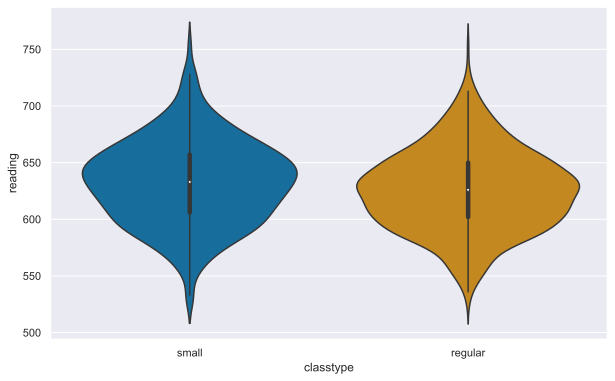

In [61]:
sns.violinplot(x="classtype", y="reading", data=df_star)

L'ipotesi nulla è che i dati provengono da due popolazioni aventi la stessa media: $H_0: \mu_1 - \mu_2 = 0$. Useremo un test bilaterale, ovvero rifiuteremo $H_0$ sia quando il valore $T$ cade nella regione di rifiuto perché $\mu_1 > \mu_2 = 0$, sia quando cade nella regione di rifiuto perché $\mu_1 < \mu_2 = 0$.

Per semplicità, credo due DataFrame, uno per ciascun gruppo.

In [62]:
df_small = df_star[df_star['classtype'] == 'small']
df_regular = df_star[df_star['classtype'] == 'regular']

Svolgo il test $t$ di Student per due gruppi indipendenti con la funzione `ttest`.

In [63]:
res = pg.ttest(df_small["reading"], df_regular["reading"], paired=False)
print(res)

               T          dof alternative    p-val          CI95%   cohen-d  \
T-test  3.495654  1220.993525   two-sided  0.00049  [3.16, 11.26]  0.197183   

          BF10     power  
T-test  25.771  0.938789  


**Interpretazione.** Avendo ottenuto un valore-p minore di $\alpha$, si conclude rifiutando l'ipotesi nulla di uguaglianza delle due medie. Si presti però attenzione al $d$ di Cohen: $d$ = 0.20. Ciò significa che la dimensione dell'effetto è piccola.

Svolgiamo ora i calcoli passo-passo. Calcoliamo la differenza tra le medie dei due gruppi.

In [66]:
mean_diff = np.mean(df_small["reading"]) - np.mean(df_regular["reading"])
mean_diff


7.210546686018347

Troviamo i gradi di libertà per la differenza tra due medie indipendenti.

In [67]:
num_rows = df_star.shape[0]
num_rows


1274

In [68]:
dof = 2 * num_rows - 2
dof


2546

Troviamo il valore critico per un test bilaterale.

In [69]:
t_c = st.t.ppf(0.975, dof)
t_c

1.9608961841574426

Se non assumiamo che le due varianze siano uguali, allora l'errore standard per la differenza tra le medie di due gruppi indipendenti è

$$
\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}.
$$

In [70]:
se_diff = np.sqrt(
    np.var(df_small["reading"], ddof=1) / len(df_small["reading"]) +
    np.var(df_regular["reading"], ddof=1) / len(df_regular["reading"])
    )
se_diff

2.062717362688251

Troviamo il valore della statistica $T$.

In [71]:
T = mean_diff / se_diff
print(T)

3.4956542357413185

Troviamo il valore-p.

In [73]:
(1 - st.t.cdf(T, df=dof)) * 2

0.00048098567334808884

Calcoliamo ora l'intervallo di fiducia al 95% per la differenza tra le medie dei due gruppi:

$$
(\bar{X}_1 - \bar{X}_2) \pm t_{n_1 + n_2 - 2} \cdot \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}.
$$

In [74]:
pm = np.array([-1, +1])
ci = mean_diff + pm * (t_c * se_diff)
print(ci)

[ 3.16577208 11.25532129]


**Interpretazione.** Dai risultati ottenuti, si può concludere che l'effetto causale medio di frequentare una classe piccola sui punteggi dei test di lettura di terza elementare, per tutti gli studenti della popolazione target, è probabilmente un aumento compreso tra 3.17 e 11.25 punti.

### Margine d'errore

Esiste un modo alternativo di esprimere gli intervalli di confidenza, che è popolare nel mondo dei sondaggi. Coinvolge l'uso di ciò che è noto come "margine di errore", definito come la metà della larghezza dell'intervallo di confidenza. Utilizzando questo termine, possiamo esprimere l'intervallo di confidenza come: 

$$
\text{stimatore} \pm \text{margine di errore.} 
$$

Per i dati presenti, possiamo dire che frequentare una classe piccola produce un incremento atteso di 7.21 ± 4.04 punti sui punteggi dei test di lettura di terza elementare. L'ampiezza dell'intervallo di confidenza è qui di 8.08 punti, quindi il margine di errore è di 4.04 punti. 

Si deve notare la differenza concettuale tra il risultato espresso in termini di intervallo di confidenza o margine d'errore, che rappresenta una differenza *assoluta* tra le medie dei due gruppi, e l'indice $d$ di Cohen, il quale rappresenta una differenza *relativa* tra le medie dei due gruppi, ponderata in base all'incertezza della stima. In altre parole, mentre il margine d'errore esprime la precisione della stima assoluta della differenza tra le medie, l'indice $d$ di Cohen esprime la dimensione dell'effetto relativo tra i due gruppi, tenendo conto della variazione naturale dei dati.

## Inferenza sulle proporzioni

Occupiamoci ora dell'inferenza sulla proporzione di una popolazione. La teoria delle probabilità ci dice che il valore atteso della proporzione campionaria $\hat p$ è la proporzione $p$ della popolazione e che la deviazione standard della proporzione campionaria è la deviazione standard della variabile casuale binomiale $Y$ divisa per $n$:

$$\begin{align}
\mu_{\hat p}&=\frac{\mu_Y}{n} = p \\
\sigma_{\hat p} &=\frac{\sigma_Y}{n} = \frac{\sqrt{n \cdot p \cdot (1-p)}}{n} = \sqrt{\frac{p \cdot (1-p)}{n}}
\end{align}$$

Questo punto può essere chiarito da una simulazione. Supponiamo di esaminare 10000 campioni casuali di ampiezza 10 estratti da una popolazione nella quale la probabilità di "successo" è 0.6.

In [110]:
p = 0.6
n = 10
X = st.bernoulli(p)
Y = [X.rvs(n) for i in range(10000)]

I primi 5 campioni sono i seguenti.

In [77]:
Y[0:5]

[array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0]),
 array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1]),
 array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1]),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])]

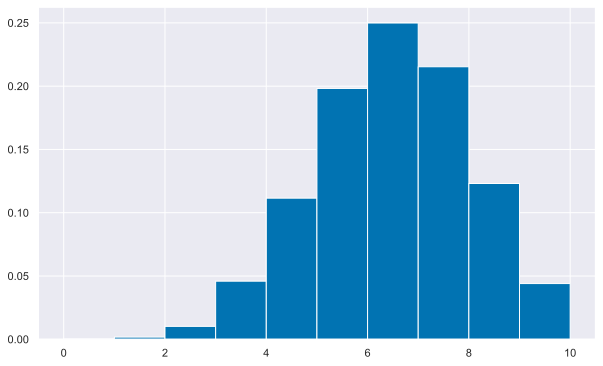

In [111]:
_ = plt.hist(np.sum(Y, axis=1), density=True)

L'istogramma precedente è un'approssimazione empirica della distribuzione delle proporzioni campionarie di ampiezza 10 estratte da una popolazione con probabilità di successo uguale a 0.6.

In [112]:
print('Media empirica della distribuzione campionaria: {}'.format(np.mean(np.mean(Y, axis=1))))
print('Valore teorico atteso: {}'.format(p))

Media empirica della distribuzione campionaria: 0.5989999999999999
Valore teorico atteso: 0.6


In [113]:
print('Stima empirica della deviazion standard: {}'.format(np.std(np.mean(Y, axis=1))))
print('Deviazione standard teorica: {}'.format(np.sqrt(p*(1-p)/n)))

Stima empirica della deviazion standard: 0.15540592009315474
Deviazione standard teorica: 0.15491933384829668


Man mano che aumenta il numero di campioni estratti dalla popolazione, i due valori diventano sempre più simili.

Per quel che riguarda la forma della distribuzione, come conseguenza del TLC possiamo dire che la distribuzione delle proporzioni campionarie tende sempre più ad assumere una forma normale all'aumentare della dimensione dei campioni.

Per mettere alla prova il TLC, consideriamo un caso estremo, ovvero una popolazione nella quale la probabilità di successo è 0.03. Supponiamo che la numerosità campionaria sia uguale a 100.

In [122]:
p = 0.03
n = 100
X = st.bernoulli(p)
Y = [X.rvs(n) for i in range(10000)]

In [116]:
print('Media empirica della distribuzione campionaria: {}'.format(np.mean(np.mean(Y, axis=1))))
print('Valore teorico atteso: {}'.format(p))

Media empirica della distribuzione campionaria: 0.029987
Valore teorico atteso: 0.03


In [117]:
print('Stima empirica della deviazion standard: {}'.format(np.std(np.mean(Y, axis=1))))
print('Deviazione standard teorica: {}'.format(np.sqrt(p*(1-p)/n)))

Stima empirica della deviazion standard: 0.017163036765094924
Deviazione standard teorica: 0.01705872210923198


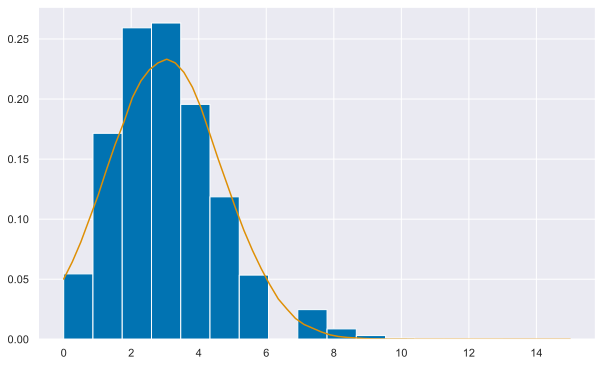

In [125]:
normal = np.random.normal(p * n, np.sqrt(n * p * (1 - p)), (100000,))
density = st.gaussian_kde(normal)
n_, x, _ = plt.hist(normal, bins=np.linspace(0, 15, 60), histtype="step", density=True)
plt.close()

plt.hist(np.sum(Y, axis=1), bins=15, density=True)
plt.plot(x, density(x))


Aumentiamo ora la numerosità del campione a 300 osservazioni.

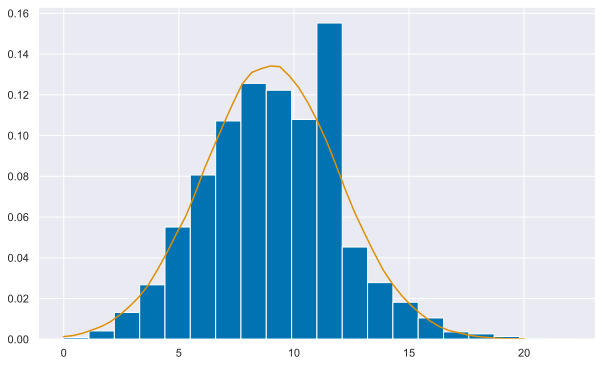

In [128]:
p = 0.03
n = 300
X = st.bernoulli(p)
Y = [X.rvs(n) for i in range(10000)]

normal = np.random.normal(p * n, np.sqrt(n * p * (1 - p)), (100000,))
density = st.gaussian_kde(normal)
n_, x, _ = plt.hist(normal, bins=np.linspace(0, 20, 50), histtype="step", density=True)
plt.close()

plt.hist(np.sum(Y, axis=1), bins=20, density=True)
plt.plot(x, density(x))

In [119]:
print('Media empirica della distribuzione campionaria: {}'.format(np.mean(np.mean(Y, axis=1))))
print('Valore teorico atteso: {}'.format(p))

Media empirica della distribuzione campionaria: 0.030005
Valore teorico atteso: 0.03


In [120]:
print('Stima empirica della deviazion standard: {}'.format(np.std(np.mean(Y, axis=1))))
print('Deviazione standard teorica: {}'.format(np.sqrt(p*(1-p)/n)))

Stima empirica della deviazion standard: 0.009867284749784681
Deviazione standard teorica: 0.009848857801796104


### Brexit

Prendiamo in considerazione un ulteriore relativo all'indagine BES condotta prima del referendum sulla Brexit del 2016 al fine di valutare l'opinione pubblica dell'intera popolazione del Regno Unito. Importiamo i dati.

In [3]:
bes = pd.read_csv("data/BES.csv")
bes.head()


vote  leave  education  age
0       leave    1.0        3.0   60
1       leave    1.0        NaN   56
2        stay    0.0        5.0   73
3       leave    1.0        4.0   64
4  don't know    NaN        2.0   68

In [4]:
bes.shape

(30895, 4)

Eliminiamo le righe del DataFrame che contengono dati mancanti.

In [5]:
bes_cleaned = bes.dropna()
bes_cleaned.shape

(25097, 4)

Calcoliamo la proporzione di risposte "leave".

In [6]:
bes_cleaned["leave"].mean()

0.47188907040682154

L'output del sondaggio BES indica che il 47.19% dei partecipanti era a favore della Brexit. Tuttavia, non possiamo inferire da questo risultato che circa il 47% di tutti gli elettori del Regno Unito era a favore della Brexit, poiché si tratta di un risultato a livello di campione. Per generalizzare a livello di popolazione, dobbiamo considerare la variabilità campionaria che introduce rumore nei nostri risultati.

Abbiamo visto sopra che la distribuzione campionaria di una proporzione presenta le seguenti caratteristiche:

- La media della distribuzione campionaria di una proporzione è uguale alla proporzione della popolazione. Ciò significa che in media, la proporzione dei valori del campione è uguale alla proporzione della popolazione.
- La deviazione standard della distribuzione campionaria di una proporzione è calcolata come $\sqrt{\pi (1-\pi) / n}$, dove $\pi$ rappresenta la proporzione della popolazione e $n$ è la dimensione del campione. La deviazione standard rappresenta la dispersione dei valori del campione intorno alla proporzione della popolazione. Possiamo stimare l'errore standard sostituendo $\pi$ con $p$, la proporzione campionaria.
- La distribuzione campionaria di una proporzione tende alla normale se la dimensione del campione è grande.

Per fare inferenze sul parametro $\pi$ della popolazione (la proporzione di elettori del Regno Unito a favore della Brexit nel 2016), possiamo costruire un intervallo di confidenza al 95% per la proporzione nella popolazione.

Per iniziare il calcolo dell'intervallo di confidenza, dobbiamo prima determinare la dimensione del campione.

In [7]:
n = bes_cleaned.shape[0]
n

25097

Possiamo stimare l'errore standard di una proporzione con la formula 
$
SE = \sqrt{p (1-p) / n}.
$

In [13]:
p = bes_cleaned["leave"].mean()
se = np.sqrt(p * (1 - p) / n)
print(se)


0.0031511685382488307


Troviamo il limite inferiore e il limite superiore dell'intervallo di fiducia al 95%.

In [34]:
pm = np.array([-1, +1])
ci = np.mean(bes_cleaned["leave"]) + pm * st.norm.ppf(0.975) * se
print(f"L'intervallo di fiducia al 95% è [{ci[0]:.4f}, {ci[1]:.4f}].")

L'intervallo di fiducia al 95% è [0.4657, 0.4781].


Secondo l'approccio frequentista, è possibile affermare che la proporzione di sostegno per la Brexit tra tutti gli elettori del Regno Unito nel 2016 era compresa con una probabilità del 95% tra il 46.57% e il 47.81%. Questo intervallo di confidenza è stato ottenuto mediante una procedura di stima con un livello di confidenza del 95%, il quale indica la probabilità che l'intervallo contenga il vero valore del parametro.

Inoltre, il margine di errore, che rappresenta la metà della larghezza dell'intervallo di confidenza, è di 0.62 punti percentuali. Ciò significa che la proporzione di sostegno per la Brexit tra tutti gli elettori del Regno Unito nel 2016 era probabilmente del 47.19%, con un margine di errore di 0.62 punti percentuali.

Si noti che il margine di errore dipende dalla dimensione del campione. Nel caso del sondaggio BES, che ha una grande dimensione del campione di 25097 osservazioni, il margine di errore è relativamente piccolo. Tuttavia, per la maggior parte dei sondaggi che hanno una dimensione del campione molto più piccola, di circa 1000 osservazioni, il margine di errore sarà molto più grande. In generale, all'aumentare della dimensione del campione, la larghezza dell'intervallo di confidenza diminuisce, e viceversa.


### Supporto per la Brexit ed età

Con i dati del sondaggio BES facciamo un altro esempio relativo al confronto tra due medie indipendenti. Nello specifico, esamineremo la differenza d'età tra gli elettori che hanno espresso supporto per la Brexit e quelli che invece hanno sostenuto la posizione "stay".


<Axes: xlabel='leave', ylabel='age'>

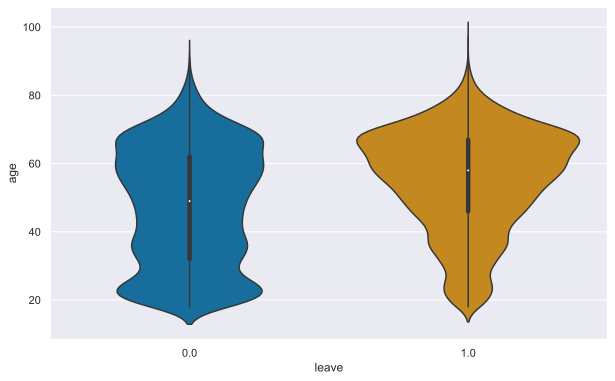

In [40]:
sns.violinplot(x="leave", y="age", data=bes)


Il violin plot rivela che l'età media dei sostenitory della posizione "leave" è più alta dell'età media del gruppo "stay". Si noti però che le due distribuzioni non sembrano gaussiane.

Per verificare l'ipotesi di gaussianità dei dati, usiamo un QQ-plot (Quantile-Quantile plot). Un QQ-plot è uno strumento grafico utilizzato per verificare se una distribuzione di dati segue o meno una distribuzione teorica, come ad esempio una distribuzione normale. In pratica, un QQ-plot confronta i quantili di una distribuzione di dati con quelli di una distribuzione teorica, disegnando un grafico dei quantili teorici lungo l'asse x e dei quantili dei dati lungo l'asse y. Se i dati seguono la distribuzione teorica, allora i punti nel QQ-plot si distribuiranno lungo una linea retta. Se invece ci sono deviazioni dalla distribuzione teorica, i punti nel QQ-plot si discosteranno dalla retta e si potrà individuare in che punto si verificano le maggiori deviazioni.

In [97]:
ax = pg.qqplot(bes["age"], dist="norm")


Si può osservare dal QQ-plot che i valori di età estremi della distribuzione differiscono marcatamente dalle corrispondenti aspettative teoriche. Solo per fare un esecizio, proseguiamo comunque con l'analisi dei dati e applichiamo il test t di Student ai due gruppi d'età. Si noti però che, per dati non normali, una tale procedura di analisi statistica è inappropriata. 

Possiamo anche visualizzare i dati dei due gruppi tramite un KDE plot (da notare che questa rappresentazione è già inclusa nel violin plot precedente).

<Axes: xlabel='age', ylabel='Density'>

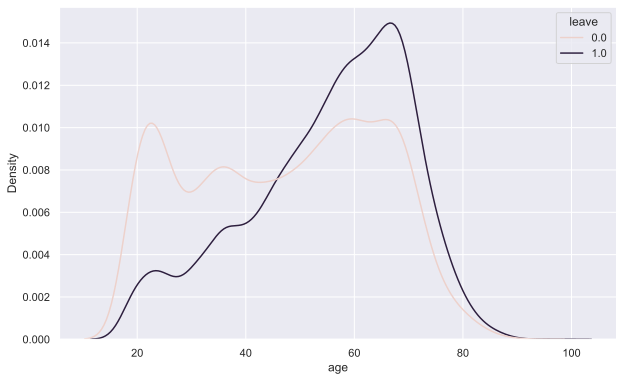

In [104]:
sns.kdeplot(data=bes, x="age", hue="leave")

Per agevolare il test t di Student, dividiamo il DataFrame originale in due DataFrame distinti.

In [55]:
leave_df = bes[bes["leave"] == 1]
stay_df = bes[bes["leave"] == 0]


L'ipotesi nulla che viene sottoposta a verifica con il test t di Student è l'uguaglianza delle medie dei valori dell'età nelle due popolazioni da cui i campioni sono stati estratti: $H_0: \mu_{\text{leave}} = \mu_{\text{stay}}$. Il test t di Student può essere facilmente eseguito utilizzando la funzione `ttest` del pacchetto `pingouin`.

In [66]:
res = pg.ttest(leave_df["age"], stay_df["age"], paired=False)
print(res)

                T           dof alternative  p-val         CI95%   cohen-d  \
T-test  41.588603  27738.840259   two-sided    0.0  [7.63, 8.38]  0.495062   

       BF10  power  
T-test  inf    1.0  


Svolgiamo ora i calcoli applicando la formula del test t di Student. La statistica $t$ di Student per la differenza tra le medie di due campioni indipendenti è

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}},$$

dove $\bar{x}_1$ e $\bar{x}2$ sono le medie dei due campioni, $s^2_1$ e $s^2_2$ sono le varianze dei due campioni e $n_1$ e $n_2$ sono le dimensioni dei due campioni.

In [57]:
n_l = leave_df.shape[0]
n_l

13692

In [58]:
n_s = stay_df.shape[0]
n_s

14352

In [59]:
n_l + n_s - 2

28042

Calcoliamo l'errore standard della differenza delle medie di due campioni indipendenti.

In [83]:
se = np.sqrt(
    (np.var(leave_df["age"], ddof=1) / n_l) + 
    (np.var(stay_df["age"], ddof=1) / n_s)
) 
se

0.1925012681643277

Troviamo la statistica t di Student.

In [86]:
T = (np.mean(leave_df["age"]) - np.mean(stay_df["age"])) / se

41.588602727597156

Troviamo il valore-p con la funzione `t.sf` che calcola l'area sottesa alla funzione $t$ nella coda di destra. È importante notare che le funzioni Python che abbiamo utilizzato in precedenza calcolano i gradi di libertà in modo diverso rispetto alla formula $n_1+n_2-2$. Infatti, il numero di gradi di libertà calcolato come $n_1+n_2-2$ è appropriato solo quando le varianze delle due popolazioni sono uguali. Se le varianze sono diverse, è necessario introdurre un fattore di correzione, che viene calcolato mediante software. Tuttavia, per questo esercizio, procederemo con $n_1+n_2-2$, poiché per un valore $t$ così estremo non fa alcuna differenza. 

In [87]:
2 * st.t.sf(T, df = n_l + n_s - 2)

0.0

Poniamoci ora l'obiettivo di trovare l'intervallo di fiducia per la differenza tra le due medie. Iniziamo a trovare il valore critico della distribuzione $t$ corrispondente al livello di significatività scelto.

In [91]:
t_c = st.t.ppf(0.975, df=n_l + n_s - 2)
t_c

1.9600485852064147

Possiamo ora trovare l'intervallo di fiducia.

In [96]:
pm = np.array([-1, +1])
ci = (np.mean(leave_df["age"]) - np.mean(stay_df["age"])) + pm * t_c * se
print(f"L'intervallo di fiducia al 95% è [{ci[0]:.2f}, {ci[1]:.2f}].")

L'intervallo di fiducia al 95% è [7.63, 8.38].


In conclusione, l'intervallo di confidenza al 95% per la differenza di età media tra i sostenitori della Brexit e coloro che sostenevano la posizione 'stay' è [7.63, 8.38]. Ciò significa che, utilizzando una procedura di stima corretta nel 95% dei casi, ci si aspetta che l'età media dei sostenitori della Brexit sia 8 anni superiore a quella dei sostenitori della posizione 'stay', con un'incertezza di +/- 0.375 anni.

In [99]:
np.mean(leave_df["age"]) - np.mean(stay_df["age"])

8.00585876624487

In [100]:
(8.38 - 7.63) / 2

0.37500000000000044

## Watermark

In [39]:
%load_ext watermark
%watermark -n -u -v -iv 

Last updated: Sat May 06 2023

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.13.2

scipy      : 1.10.1
seaborn    : 0.12.2
matplotlib : 3.7.1
arviz      : 0.15.1
numpy      : 1.23.5
statsmodels: 0.14.0
xarray     : 2023.4.2
pandas     : 1.5.3

